In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df= pd.read_csv('Retail_data.csv')

In [9]:
pd.set_option("display.max_columns",df.shape[1])

In [10]:
df.sample(5)

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,ordered_item_quantity,net_quantity,returned_item_quantity,order_name,product_type,product_title,product_vendor,variant_title,api_client_title
11718,11-07-2021 12:00,3.918320e+12,5.381900e+12,6.728000e+12,1.05,3.996290e+13,1,1.92,0.0,0.0,1.92,0.0,0.18,2.10,1,1,0,#3247,Masalas & Spices,TRS Dalchini Whole Cinnamon,TRS,50 g,Point of Sale
55852,30-12-2021 12:00,4.615150e+12,5.268680e+12,6.723260e+12,0.95,3.994350e+13,1,3.48,0.0,0.0,3.48,0.0,0.32,3.80,2,2,0,#11957,Fresh Produce,Coriander Leaves (Per Bunch),dbanyan,NaN,Point of Sale
97441,13-05-2022 17:00,4.754360e+12,5.356290e+12,0.000000e+00,1.23,0.000000e+00,1,2.04,0.0,0.0,2.04,0.0,0.42,2.46,1,1,0,#19646,NaN,Fresh Green chilli (124 g),NaN,NaN,Point of Sale
74867,02-03-2022 15:00,4.676300e+12,6.029400e+12,6.659360e+12,2.29,3.967570e+13,1,4.20,0.0,0.0,4.20,0.0,0.38,4.58,1,1,0,#15412,"Pulses, Grains & Millets",TRS Red Kidney Beans / Rajma,TRS,500 g,Online Store
35521,15-10-2021 18:00,4.208870e+12,5.281610e+12,6.987940e+12,2.99,4.087450e+13,1,5.48,0.0,0.0,5.48,0.0,0.50,5.98,1,1,0,#7944,"Pulses, Grains & Millets",Top Op Lapsi/Bulgar/Crushed Wheat - Fine,Top Op,1 kg,Point of Sale


In [11]:
df.orders.value_counts()

1    95296
0     6633
Name: orders, dtype: int64

In [12]:
df.shape

(101929, 23)

In [13]:
df.isnull().sum()

hour                          0
order_id                      0
customer_id                   0
product_id                    0
product_price                 0
variant_id                    0
orders                        0
gross_sales                   0
discounts                     0
returns                       0
net_sales                     0
shipping                      0
taxes                         0
total_sales                   0
ordered_item_quantity         0
net_quantity                  0
returned_item_quantity        0
order_name                 5961
product_type              22861
product_title              6483
product_vendor            22366
variant_title             31316
api_client_title           5961
dtype: int64

In [14]:
for col in list(df):
    print(f"{col} ---->{df[col].nunique()}")

hour ---->8855
order_id ---->10767
customer_id ---->1038
product_id ---->803
product_price ---->1177
variant_id ---->699
orders ---->2
gross_sales ---->1376
discounts ---->395
returns ---->138
net_sales ---->1506
shipping ---->6
taxes ---->375
total_sales ---->1577
ordered_item_quantity ---->18
net_quantity ---->23
returned_item_quantity ---->6
order_name ---->19374
product_type ---->16
product_title ---->8074
product_vendor ---->174
variant_title ---->188
api_client_title ---->4


In [15]:
df.nunique().to_frame()

,0
hour,8855
order_id,10767
customer_id,1038
product_id,803
product_price,1177
variant_id,699
orders,2
gross_sales,1376
discounts,395
returns,138


# Product analysis

In [16]:
df1=df.dropna()

In [17]:
df1.product_type.unique()

array(['Masalas & Spices', 'Others', 'Rice & Rice products',
       'Sweets & Snacks', 'Ready to Cook & Eat', 'Organic', 'Beverages',
       'Pickles, Pastes & Papad', 'Flour & Atta',
       'Pulses, Grains & Millets', 'Noodles & Vermicelli',
       'Health & Body Care', 'Frozen foods', 'Oil', 'Fresh Produce',
       'Pooja Item'], dtype=object)

In [18]:
product_orders=df1.groupby('product_type')[['orders']].sum().sort_values(by='orders',ascending=False).reset_index()
product_orders

,product_type,orders
0,Sweets & Snacks,16789
1,Frozen foods,8379
2,Masalas & Spices,7300
3,Others,5448
4,"Pulses, Grains & Millets",5223
5,"Pickles, Pastes & Papad",4151
6,Rice & Rice products,4025
7,Ready to Cook & Eat,3833
8,Flour & Atta,3580
9,Noodles & Vermicelli,3155


In [19]:
product_sales=df1.groupby('product_type')[['total_sales']].sum().sort_values(by='total_sales',ascending=False).reset_index()
product_sales

,product_type,total_sales
0,Sweets & Snacks,95172.74
1,Frozen foods,77319.64
2,Rice & Rice products,61453.36
3,"Pulses, Grains & Millets",40477.44
4,Flour & Atta,39526.22
5,Others,37904.90
6,Masalas & Spices,32023.62
7,Ready to Cook & Eat,29291.16
8,"Pickles, Pastes & Papad",21054.76
9,Beverages,17891.24


In [20]:
pd.merge(left=product_orders,right=product_sales,on='product_type',how='inner')

,product_type,orders,total_sales
0,Sweets & Snacks,16789,95172.74
1,Frozen foods,8379,77319.64
2,Masalas & Spices,7300,32023.62
3,Others,5448,37904.90
4,"Pulses, Grains & Millets",5223,40477.44
5,"Pickles, Pastes & Papad",4151,21054.76
6,Rice & Rice products,4025,61453.36
7,Ready to Cook & Eat,3833,29291.16
8,Flour & Atta,3580,39526.22
9,Noodles & Vermicelli,3155,16181.66


In [21]:
product_type_analysis=df1.groupby('product_type').agg({'orders':sum,'total_sales':sum}).reset_index()
product_type_analysis

,product_type,orders,total_sales
0,Beverages,1375,17891.24
1,Flour & Atta,3580,39526.22
2,Fresh Produce,2970,15771.52
3,Frozen foods,8379,77319.64
4,Health & Body Care,1482,13532.18
5,Masalas & Spices,7300,32023.62
6,Noodles & Vermicelli,3155,16181.66
7,Oil,1074,13906.94
8,Organic,1182,7293.68
9,Others,5448,37904.90


Text(0.5, 1.0, 'Total Orders and Sales per product Type')

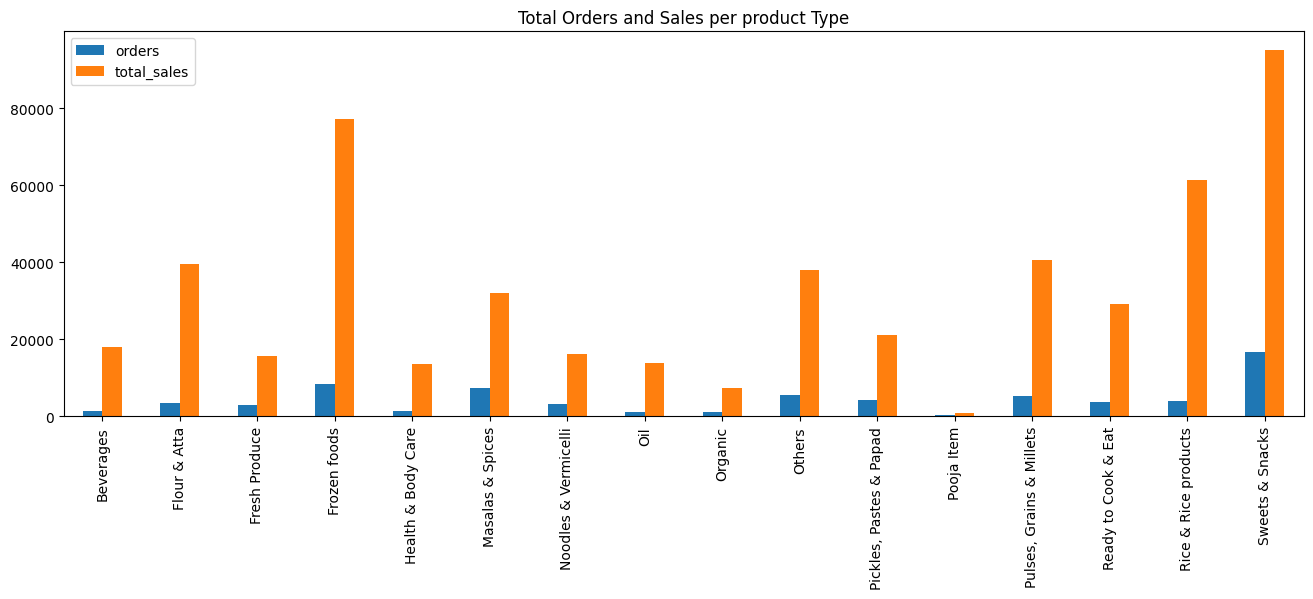

In [22]:
product_type_analysis.plot(kind='bar',figsize=(16,5));
plt.xticks(range(0,16),product_type_analysis['product_type'].values);
plt.title("Total Orders and Sales per product Type")

In [23]:
df1.api_client_title.value_counts()

Point of Sale                 65082
Online Store                   5214
Draft Orders                     27
Shopify Mobile for Android       14
Name: api_client_title, dtype: int64

In [24]:
source_of_sales=df1.pivot_table(index='api_client_title',columns='product_type',values='total_sales',aggfunc='sum')
source_of_sales

product_type,Beverages,Flour & Atta,Fresh Produce,Frozen foods,Health & Body Care,Masalas & Spices,Noodles & Vermicelli,Oil,Organic,Others,"Pickles, Pastes & Papad",Pooja Item,"Pulses, Grains & Millets",Ready to Cook & Eat,Rice & Rice products,Sweets & Snacks
api_client_title,,,,,,,,,,,,,,,,
Draft Orders,NaN,97.24,2.00,0.00,NaN,34.34,7.58,NaN,15.56,213.44,3.98,NaN,29.94,NaN,45.34,3.78
Online Store,1517.44,5838.04,4328.98,3828.76,1035.42,3091.02,1258.60,1685.34,27.00,2427.24,1846.92,98.00,4018.42,1647.34,9676.18,3898.00
Point of Sale,16373.80,33503.82,11437.56,73482.90,12496.76,28898.26,14909.50,12195.24,7251.12,35254.24,19203.86,681.94,36425.38,27643.82,51731.84,91187.10
Shopify Mobile for Android,NaN,87.12,2.98,7.98,NaN,NaN,5.98,26.36,0.00,9.98,NaN,NaN,3.70,NaN,NaN,83.86


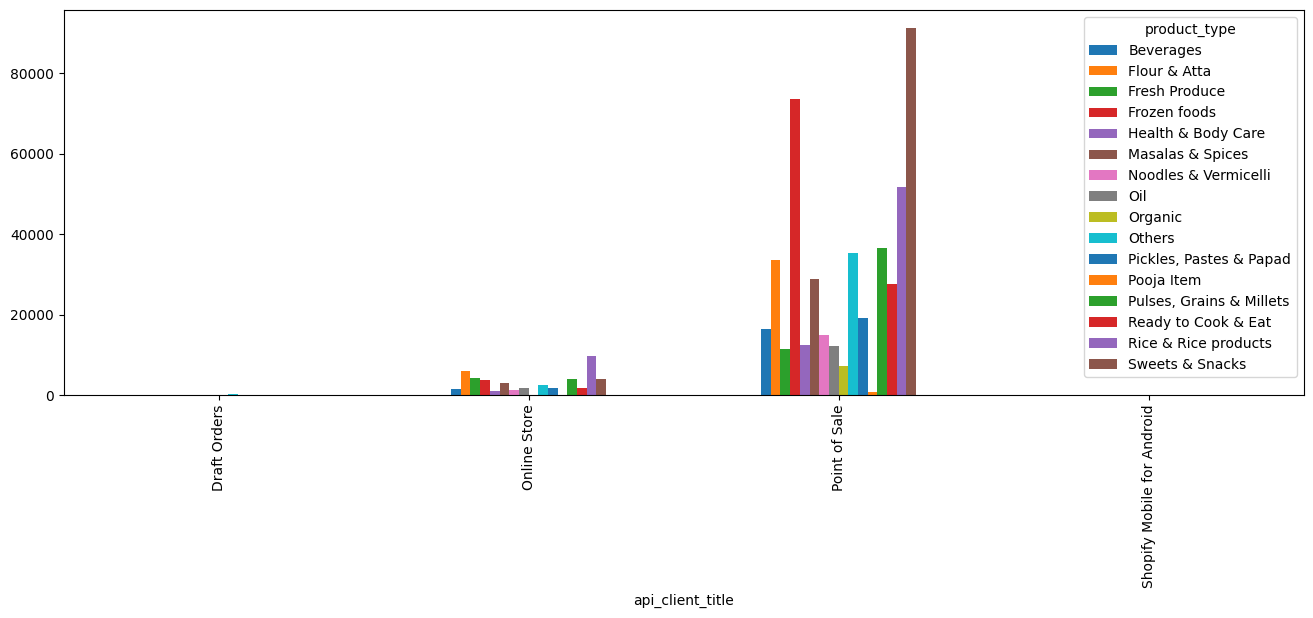

In [25]:
source_of_sales.plot(kind='bar',figsize=(16,5));

In [26]:
source_of_mean_sales=df1.pivot_table(index='api_client_title',columns='product_type',values='total_sales',aggfunc='mean')
source_of_mean_sales

product_type,Beverages,Flour & Atta,Fresh Produce,Frozen foods,Health & Body Care,Masalas & Spices,Noodles & Vermicelli,Oil,Organic,Others,"Pickles, Pastes & Papad",Pooja Item,"Pulses, Grains & Millets",Ready to Cook & Eat,Rice & Rice products,Sweets & Snacks
api_client_title,,,,,,,,,,,,,,,,
Draft Orders,NaN,16.206667,2.000000,0.000000,NaN,17.170000,7.580000,NaN,7.780000,53.360000,3.980000,NaN,9.980000,NaN,15.113333,1.260000
Online Store,14.876863,15.322940,5.913907,9.548030,10.151176,4.740828,6.730481,15.605000,4.500000,8.731079,5.116122,2.969697,7.742620,7.733991,19.992107,5.951145
Point of Sale,12.832132,10.463404,5.117477,9.206076,9.029451,4.339730,5.021724,12.624472,6.150229,6.805838,5.061639,3.294396,7.727064,7.613280,14.572349,5.644862
Shopify Mobile for Android,NaN,87.120000,1.490000,1.995000,NaN,NaN,5.980000,13.180000,0.000000,9.980000,NaN,NaN,3.700000,NaN,NaN,83.860000


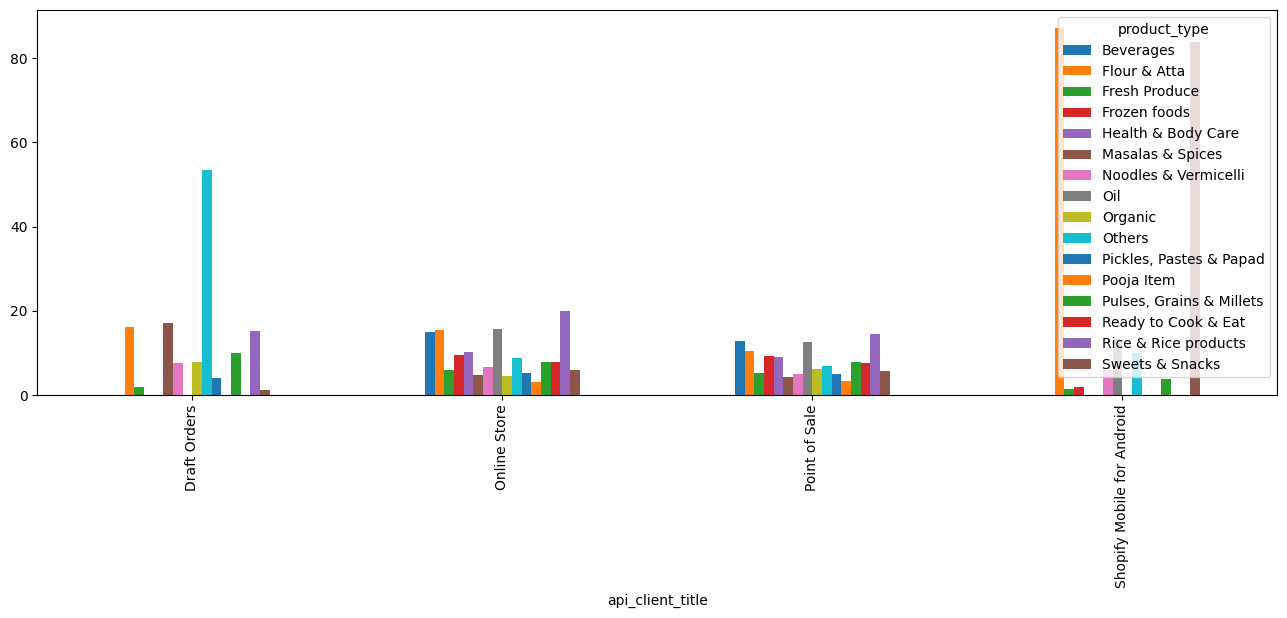

In [27]:
source_of_mean_sales.plot(kind='bar',figsize=(16,5));

# Time Wise Sales analysis

In [28]:
df.sample()

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,ordered_item_quantity,net_quantity,returned_item_quantity,order_name,product_type,product_title,product_vendor,variant_title,api_client_title
51967,15-12-2021 18:00,4.599630e+12,5.268980e+12,6.648390e+12,6.99,3.962300e+13,1,12.82,0.0,0.0,12.82,0.0,1.16,13.98,1,1,0,#11196,Frozen foods,Haldiram's Punjabi Samosa (Frozen),Haldiram's,650 g,Point of Sale


In [29]:
df1['year']=pd.to_datetime(df['hour']).dt.year

C:\Users\User\AppData\Local\Temp\ipykernel_36592\2057391971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year']=pd.to_datetime(df['hour']).dt.year


In [30]:
df1.sample()

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,...,total_sales,ordered_item_quantity,net_quantity,returned_item_quantity,order_name,product_type,product_title,product_vendor,variant_title,api_client_title,year
75213,03-03-2022 15:00,4.677200e+12,5.921550e+12,7.481150e+12,2.95,4.226590e+13,1,5.42,0.0,0.0,5.42,...,5.9,1,1,0,#15477,Flour & Atta,Chakra Maida Flour,Chakra,1 kg,Point of Sale,2022


In [31]:
df1['day']=pd.to_datetime(df1['hour']).dt.day
df1['month']=pd.to_datetime(df1['hour']).dt.month
df1['weekday']=pd.to_datetime(df1['hour']).dt.weekday
df1['time']=pd.to_datetime(df1['hour']).dt.hour

C:\Users\User\AppData\Local\Temp\ipykernel_36592\2237959671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day']=pd.to_datetime(df1['hour']).dt.day
C:\Users\User\AppData\Local\Temp\ipykernel_36592\2237959671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month']=pd.to_datetime(df1['hour']).dt.month
C:\Users\User\AppData\Local\Temp\ipykernel_36592\2237959671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [32]:
df1.sample()

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,...,order_name,product_type,product_title,product_vendor,variant_title,api_client_title,year,day,month,weekday,time
46503,26-11-2021 11:00,4.572230e+12,5.590090e+12,6.921620e+12,1.15,4.063220e+13,1,2.12,0.0,0.0,2.12,...,#10191,Sweets & Snacks,Parle - Hide & Seek Fab Chocolate,Parle,112 g,Point of Sale,2021,26,11,4,11


In [33]:
yearly_sales=df1.groupby('year')['total_sales'].sum()
yearly_sales

year
2021    271081.88
2022    248499.12
Name: total_sales, dtype: float64

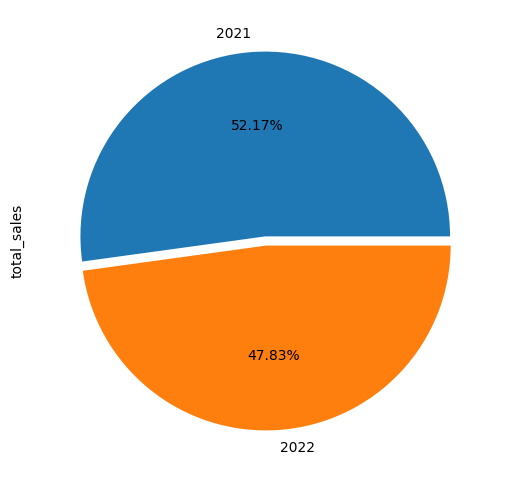

In [34]:
yearly_sales.plot(kind='pie',subplots=True,figsize=(10,6),autopct="%1.2f%%",explode=[0.025,0.025]);

In [35]:
monthly_sales=df1.groupby('month')['total_sales'].sum()
monthly_sales

month
1     46221.80
2     42117.28
3     49662.56
4     48471.76
5     55177.12
6     30787.98
7     40734.04
8     37438.36
9     37035.72
10    44825.84
11    40892.54
12    46216.00
Name: total_sales, dtype: float64

In [36]:
year_2021=df1[df1['year']== 2021]
year_2021.head()

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,...,order_name,product_type,product_title,product_vendor,variant_title,api_client_title,year,day,month,weekday,time
11,23-05-2021 11:00,3.824510e+12,5.268530e+12,5.931930e+12,0.99,3.705210e+13,1,1.82,-0.18,0.0,1.64,...,#1078,Masalas & Spices,Everest Turmeric Powder,Everest,100 g,Point of Sale,2021,23,5,6,11
12,23-05-2021 11:00,3.824510e+12,5.268530e+12,5.931930e+12,1.39,3.705210e+13,1,2.54,-0.24,0.0,2.30,...,#1078,Others,Tata Iodised Crystal Salt,Tata,1 kg,Point of Sale,2021,23,5,6,11
15,23-05-2021 11:00,3.824510e+12,5.268530e+12,5.908010e+12,10.89,3.696460e+13,1,19.96,-1.98,0.0,17.98,...,#1078,Rice & Rice products,Udhaiyam Idli Rice,Udhaiyam,5 kg,Point of Sale,2021,23,5,6,11
19,23-05-2021 11:00,3.824520e+12,0.000000e+00,5.931100e+12,0.39,3.704750e+13,1,1.42,-0.14,0.0,1.28,...,#1079,Sweets & Snacks,Parle Biscuits - Hide & Seek,Parle G,33 g,Point of Sale,2021,23,5,6,11
20,23-05-2021 11:00,3.824520e+12,0.000000e+00,5.931100e+12,1.69,3.704750e+13,1,3.08,-0.28,0.0,2.80,...,#1079,Sweets & Snacks,Parle Biscuits - Monaco,Parle G,200 g,Point of Sale,2021,23,5,6,11


In [37]:
year_2021.year.value_counts()

2021    37305
Name: year, dtype: int64

In [38]:
monthly_sales_2021=year_2021.groupby('month')['total_sales'].sum()
monthly_sales_2021

month
1      7124.50
2      8772.54
3     10418.66
4      8568.10
5     17328.08
6     22910.40
7     32687.88
8     27235.62
9     29608.86
10    37308.16
11    33353.56
12    35765.52
Name: total_sales, dtype: float64

<AxesSubplot: xlabel='month'>

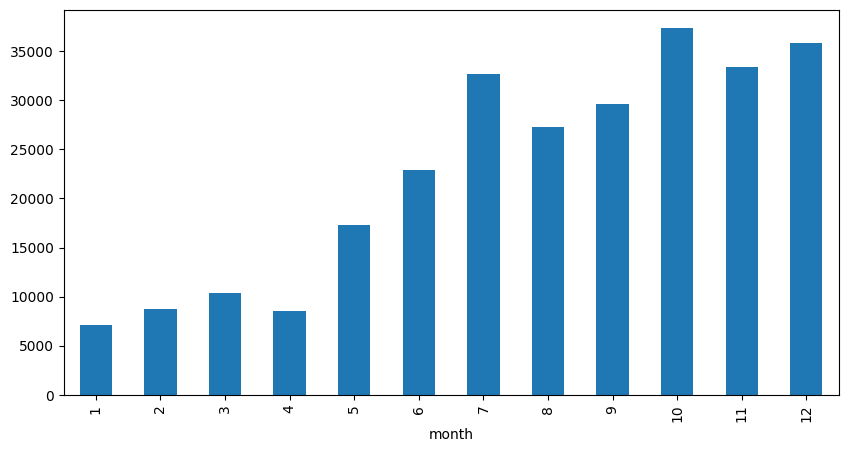

In [39]:
monthly_sales_2021.plot(kind='bar',figsize=(10,5))

<AxesSubplot: xlabel='month'>

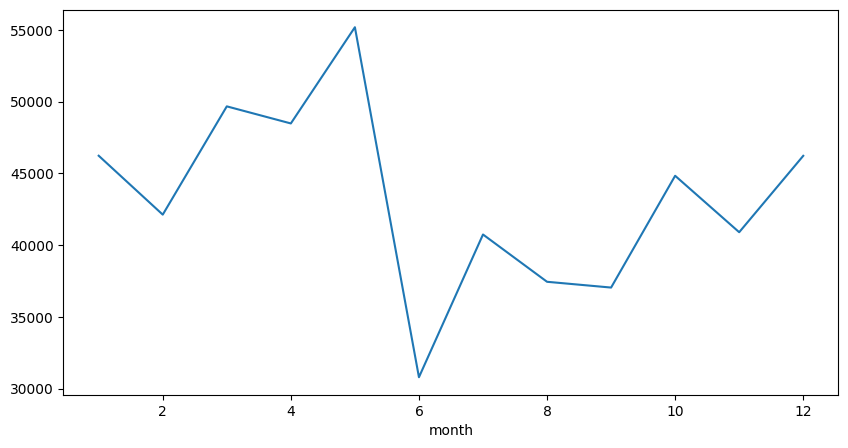

In [40]:
monthly_sales.plot(kind='line',figsize=(10,5))

# Assignments for Product Analysis Team

In [41]:
df1.columns

Index(['hour', 'order_id', 'customer_id', 'product_id', 'product_price',
       'variant_id', 'orders', 'gross_sales', 'discounts', 'returns',
       'net_sales', 'shipping', 'taxes', 'total_sales',
       'ordered_item_quantity', 'net_quantity', 'returned_item_quantity',
       'order_name', 'product_type', 'product_title', 'product_vendor',
       'variant_title', 'api_client_title', 'year', 'day', 'month', 'weekday',
       'time'],
      dtype='object')

### 1.For each product_type how many products are associated?  (Graph expected)

In [42]:
associated_products= df1.groupby('product_type')['product_title'].nunique().to_frame().reset_index().sort_values(by = 'product_title', ascending= False)
associated_products

,product_type,product_title
5,Masalas & Spices,232
15,Sweets & Snacks,224
10,"Pickles, Pastes & Papad",157
3,Frozen foods,148
9,Others,139
13,Ready to Cook & Eat,119
1,Flour & Atta,89
14,Rice & Rice products,75
12,"Pulses, Grains & Millets",71
4,Health & Body Care,68


Text(0.5, 1.0, 'Products per product Type')

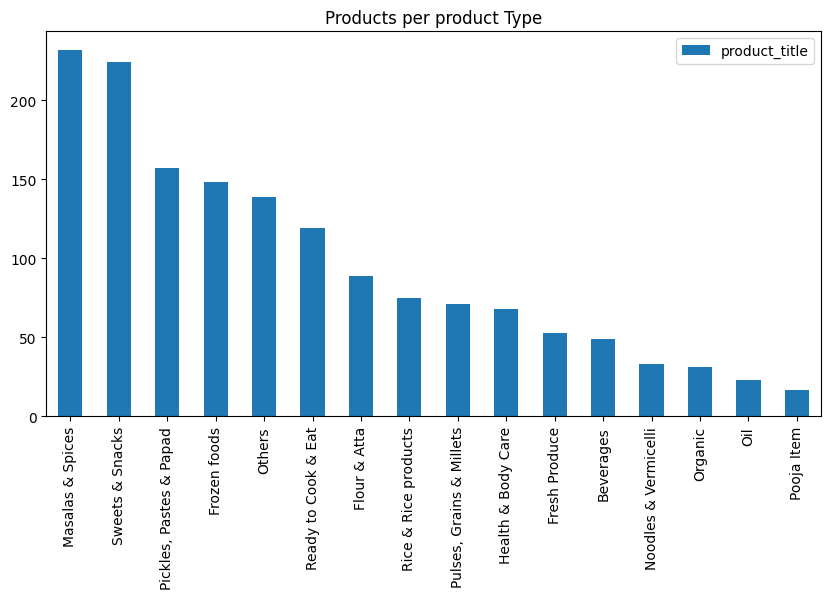

In [43]:
associated_products.plot(kind='bar',figsize=(10,5))
plt.xticks(range(0,16),associated_products['product_type'].values);
plt.title("Products per product Type")


### 2.For each product_type how many products are associated and thier sales
### Output expected:
**Output cols = product_type,product_title,total_sales**

In [44]:
product_type_sales= df1.groupby(['product_type','product_title'])['total_sales'].sum().to_frame().reset_index().sort_values(by = 'total_sales', ascending= False)
product_type_sales

,product_type,product_title,total_sales
1142,Ready to Cook & Eat,Garam Idly Dosa Batter,12172.22
1243,Rice & Rice products,Annam Sona Masoori Rice,11448.88
53,Flour & Atta,Aashirvaad Atta - Whole Wheat (Export Pack),10535.18
660,Noodles & Vermicelli,Nestlé Maggi 2 Minute Instant Noodles Masala -...,6860.06
1084,"Pulses, Grains & Millets",TRS Tur/Toor Dal,5981.30
...,...,...,...
886,"Pickles, Pastes & Papad",Ambika Mango Vathal,2.50
429,Masalas & Spices,Aachi Tamarind/Puliyodharai Mix,1.58
1023,Pooja Item,Ambala Sandhanam/Chandan/Sandalwood Powder,1.18
791,Others,Nestlé Maggi Pichkoo - Tomato Ketchup,0.58


### 3. Which product has the most sales ? (Graph expected)

In [45]:

Most_sales =df1.loc[(df1['product_title'] == 'Garam Idly Dosa Batter' )].sort_values(by = 'total_sales', ascending= False)
Most_sales

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,...,order_name,product_type,product_title,product_vendor,variant_title,api_client_title,year,day,month,weekday,time
94326,03-05-2022 21:00,4.744630e+12,6.182250e+12,6.719660e+12,5.39,3.994330e+13,1,39.56,0.00,0.00,39.56,...,#19062,Ready to Cook & Eat,Garam Idly Dosa Batter,Garam,1 kg,Online Store,2022,5,3,5,21
36456,19-10-2021 18:00,4.471510e+12,5.348450e+12,6.719660e+12,4.89,3.994330e+13,1,35.88,0.00,0.00,35.88,...,#8145,Ready to Cook & Eat,Garam Idly Dosa Batter,Garam,1 kg,Point of Sale,2021,19,10,1,18
77182,09-03-2022 22:00,4.685720e+12,6.065340e+12,6.719660e+12,5.39,3.994330e+13,1,29.66,-1.46,0.00,28.20,...,#15862,Ready to Cook & Eat,Garam Idly Dosa Batter,Garam,1 kg,Online Store,2022,3,9,5,22
44786,19-11-2021 17:00,4.563980e+12,5.314420e+12,6.719660e+12,4.89,3.994330e+13,1,26.92,0.00,0.00,26.92,...,#9865,Ready to Cook & Eat,Garam Idly Dosa Batter,Garam,1 kg,Point of Sale,2021,19,11,4,17
48133,01-12-2021 17:00,4.580490e+12,5.255880e+12,6.719660e+12,4.89,3.994330e+13,1,26.92,0.00,0.00,26.92,...,#10502,Ready to Cook & Eat,Garam Idly Dosa Batter,Garam,1 kg,Point of Sale,2021,12,1,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20913,19-08-2021 13:00,4.012950e+12,5.314420e+12,6.719660e+12,4.89,3.994330e+13,1,8.96,-0.88,0.00,8.08,...,#4978,Ready to Cook & Eat,Garam Idly Dosa Batter,Garam,1 kg,Point of Sale,2021,19,8,3,13
27660,17-09-2021 12:00,4.133090e+12,5.294130e+12,6.719660e+12,4.89,3.994330e+13,1,8.98,-1.34,0.00,7.64,...,#6366,Ready to Cook & Eat,Garam Idly Dosa Batter,Garam,1 kg,Point of Sale,2021,17,9,4,12
28351,18-09-2021 19:00,4.138670e+12,5.255880e+12,6.719660e+12,4.89,3.994330e+13,1,8.96,-1.34,0.00,7.62,...,#6509,Ready to Cook & Eat,Garam Idly Dosa Batter,Garam,1 kg,Point of Sale,2021,18,9,5,19
1786,28-05-2021 22:00,3.834930e+12,5.048710e+12,6.719660e+12,4.89,3.994330e+13,1,8.96,-4.48,0.00,4.48,...,#1443,Ready to Cook & Eat,Garam Idly Dosa Batter,Garam,1 kg,Point of Sale,2021,28,5,4,22


### Which product has the least sales?

In [46]:
least_sales =df1.loc[(df1['orders'] == 1) ].sort_values(by = 'total_sales', ascending= False)
least_sales

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,...,order_name,product_type,product_title,product_vendor,variant_title,api_client_title,year,day,month,weekday,time
12343,14-07-2021 16:00,3.926750e+12,5.389240e+12,6.723240e+12,17.59,3.994320e+13,1,193.64,-29.04,0.0,164.60,...,#3390,Others,Amul Pure Ghee,Amul,1 litre,Online Store,2021,14,7,2,16
18934,10-08-2021 19:00,3.984050e+12,5.389240e+12,6.723240e+12,17.99,3.994320e+13,1,198.04,-39.60,0.0,158.44,...,#4626,Others,Amul Pure Ghee,Amul,1 litre,Draft Orders,2021,8,10,4,19
31846,02-10-2021 16:00,4.181780e+12,0.000000e+00,6.839320e+12,10.49,4.037740e+13,1,134.74,0.00,0.0,134.74,...,#7197,Frozen foods,Crown Seekh Kebab Chicken (Frozen),Crown,900 g,Point of Sale,2021,10,2,2,16
79243,16-03-2022 15:00,4.692700e+12,6.111520e+12,6.739230e+12,17.49,4.000750e+13,1,128.36,0.00,0.0,128.36,...,#16257,Rice & Rice products,Annam Sona Masoori Rice,Annam,10 kg,Online Store,2022,16,3,2,15
100938,24-05-2022 12:00,4.764010e+12,6.156480e+12,7.525200e+12,2.99,4.243400e+13,1,131.66,-6.56,0.0,125.10,...,#20275,Beverages,Chakra Sukku Coffee,Chakra,200 g,Online Store,2022,24,5,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89037,15-04-2022 12:00,4.722630e+12,0.000000e+00,5.925760e+12,1.75,3.702700e+13,1,3.50,-3.50,0.0,0.00,...,#18086,Ready to Cook & Eat,Gits Basundi Mix,Gits,125 g,Point of Sale,2022,15,4,4,12
92022,26-04-2022 11:00,4.735940e+12,5.322220e+12,5.925800e+12,2.28,3.702700e+13,1,4.56,-4.56,0.0,0.00,...,#18638,Ready to Cook & Eat,Gits Pau/Pav Bhaji,Gits,300 g,Point of Sale,2022,26,4,1,11
76903,09-03-2022 15:00,4.685320e+12,5.281790e+12,5.913160e+12,2.49,3.698530e+13,1,4.98,-4.98,0.0,0.00,...,#15809,"Pulses, Grains & Millets",Tata Sampann Red Lentil (Masoor Dal) Unpolished,Tata,1 kg,Point of Sale,2022,3,9,5,15
75611,04-03-2022 18:00,4.678290e+12,5.273970e+12,5.913160e+12,3.49,3.698530e+13,1,6.98,-6.98,0.0,0.00,...,#15559,"Pulses, Grains & Millets",Tata Sampann Moong (Mung) Dal,Tata,1 kg,Point of Sale,2022,3,4,6,18


### 4.Does the most sold product and least sold product has equal sales in every month or not?

In [47]:
df2=df1.query("product_title in ('Garam Idly Dosa Batter','Tata Sampann Red Rice Flakes/Aval/Poha')")

salebymonth = df2.groupby(['month','product_title'])['total_sales'].aggregate(['min','max'])
salebymonth

min    max
month product_title                                       
1     Garam Idly Dosa Batter                   9.28  29.34
2     Garam Idly Dosa Batter                   9.28  21.56
3     Garam Idly Dosa Batter                   9.28  43.12
4     Garam Idly Dosa Batter                   9.28  21.56
5     Garam Idly Dosa Batter                 -10.78  21.56
      Tata Sampann Red Rice Flakes/Aval/Poha   0.00   0.00
6     Garam Idly Dosa Batter                   8.80  21.56
7     Garam Idly Dosa Batter                   8.80  29.34
8     Garam Idly Dosa Batter                   8.80  20.48
9     Garam Idly Dosa Batter                   8.30  30.74
10    Garam Idly Dosa Batter                   9.28  39.12
11    Garam Idly Dosa Batter                   8.80  29.34
12    Garam Idly Dosa Batter                   8.80  29.34

### 5.Does the most sold product and least sold product has equal sales in every year or not?

In [48]:
salebymonth = df2.groupby(['year','product_title'])['total_sales'].aggregate(['min','max'])
salebymonth

min    max
year product_title                                       
2021 Garam Idly Dosa Batter                   4.88  39.12
     Tata Sampann Red Rice Flakes/Aval/Poha   0.00   0.00
2022 Garam Idly Dosa Batter                 -10.78  43.12

### 6. Check if any products sold has any relationship w.r.t to customers? (Graph expected)

In [49]:
df = df1[df1['customer_id'].duplicated(keep=False)]
df['grouped']= df.groupby('customer_id')['product_title'].transform(lambda x: ','.join(x))
df = df[['customer_id', 'grouped']].drop_duplicates()
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_36592\2593153348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped']= df.groupby('customer_id')['product_title'].transform(lambda x: ','.join(x))


,customer_id,grouped
11,5.268530e+12,"Everest Turmeric Powder,Tata Iodised Crystal S..."
19,0.000000e+00,"Parle Biscuits - Hide & Seek,Parle Biscuits - ..."
34,5.268650e+12,"Britannia Biscuits - Bourbon,Sri Ganeshram's 7..."
35,5.268600e+12,"Aashirvaad Select Atta,MDH Garam Masala,Britan..."
36,5.250470e+12,"Haldiram's Murukku,Priya Pickle - Tomato,Haldi..."


In [50]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(25):
    print(key, value)

('Dbanyan Tas', 'Dbanyan Tas') 8391
('Nissin Top Ramen Noodles - Masala', 'Dbanyan Tas') 6864
('Garam Idly Dosa Batter', 'Garam Idly Dosa Batter') 6535
('Dbanyan Tas', 'Coriander Leaves (Per Bunch)') 6341
("Haldiram's Samosa", 'Dbanyan Tas') 5528
('Nissin Top Ramen Noodles - Fiery Chilli', 'Dbanyan Tas') 4188
('Britannia Biscuits - Bourbon', 'Dbanyan Tas') 4183
('Dbanyan Tas', "Haldiram's Tandoori Garlic Naan (Frozen)") 3978
("Haldiram's Aloo Bhujia", 'Dbanyan Tas') 3826
('Nissin Top Ramen Noodles - Masala', 'Coriander Leaves (Per Bunch)') 3808
('Parle Biscuits - Hide & Seek', 'Dbanyan Tas') 3785
("Haldiram's Tandoori Garlic Naan (Frozen)", 'Dbanyan Tas') 3768
('Nestlé Maggi 2 Minute Instant Noodles Masala - Family pack', 'Dbanyan Tas') 3632
('Daily Delight - Coconut Grated (Frozen)', 'Daily Delight - Coconut Grated (Frozen)') 3593
('Nestlé Maggi Instant Noodles - Chicken', 'Dbanyan Tas') 3563
('Garam Idly Dosa Batter', 'Dbanyan Tas') 3450
('Nissin Top Ramen Noodles - Masala', "Haldira

### 7.Check the relationship between product_title and variant w.r.t total_sales? (Graph expected).

In [92]:
variantAnalysis = df1[df1['variant_id'].duplicated(keep=False)]
df['grouped_Products']= variantAnalysis.groupby('variant_id')['product_title'].transform(lambda x: ','.join(x))
variantAnalysis = df[['variant_id', 'grouped_Products']].drop_duplicates()
variantAnalysis.head()


,variant_id,grouped_Products
11,3.705210e+13,"Everest Turmeric Powder,Tata Iodised Crystal S..."
15,3.696460e+13,"Udhaiyam Idli Rice,Udhaiyam Idli Rice,Udhaiyam..."
19,3.704750e+13,"Parle Biscuits - Hide & Seek,Parle Biscuits - ..."
21,3.993810e+13,"Parle - Hide & Seek Fab Orange,Parle - Hide & ..."
26,3.705180e+13,"Aachi Chilli Powder,Aachi Coriander/Dhaniya Po..."


In [93]:
count = Counter()

for row in df['grouped_Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(25):
    print(key, value)

('Garam Idly Dosa Batter', 'Garam Idly Dosa Batter') 563391
('Nestlé Maggi 2 Minute Instant Noodles Masala - Family pack', 'Nestlé Maggi 2 Minute Instant Noodles Masala - Family pack') 368943
('Daily Delight - Coconut Grated (Frozen)', 'Daily Delight - Coconut Grated (Frozen)') 220093
('Coriander Leaves (Per Bunch)', 'Coriander Leaves (Per Bunch)') 203203
('Dbanyan Tas', 'Dbanyan Tas') 151945
('Fresh Curry Leaves', 'Fresh Curry Leaves') 116403
('Annam Sona Masoori Rice', 'Annam Sona Masoori Rice') 77815
('Britannia Biscuits - Bourbon', 'Britannia Biscuits - Bourbon') 73953
('TRS Gram/Besan Flour', 'TRS Gram/Besan Flour') 69751
('Nissin Top Ramen Noodles - Masala', 'Nissin Top Ramen Noodles - Masala') 68635
('TRS Tur/Toor Dal', 'TRS Tur/Toor Dal') 67606
('TRS Tur/Toor Dal', 'Annam Sona Masoori Rice') 61575
('Coriander Leaves (Per Bunch)', 'Drumstick (Per Piece)') 60642
("Haldiram's Aloo Bhujia", "Haldiram's Aloo Bhujia") 59046
('TRS Red Peanuts', 'TRS Red Peanuts') 58061
('Nestlé Maggi 

### 8. Does price of the product affect the sales?

In [94]:
producteffect_sales = df1.groupby('product_type')['product_price'].sum().to_frame().reset_index().sort_values(by = 'product_price', ascending= False)
producteffect_sales 

,product_type,product_price
15,Sweets & Snacks,44006.70
3,Frozen foods,33100.80
14,Rice & Rice products,30065.09
12,"Pulses, Grains & Millets",19703.91
1,Flour & Atta,19044.83
9,Others,18033.77
5,Masalas & Spices,15592.55
13,Ready to Cook & Eat,13503.98
10,"Pickles, Pastes & Papad",10500.27
0,Beverages,8615.78


Text(0.5, 1.0, 'Products per product Type')

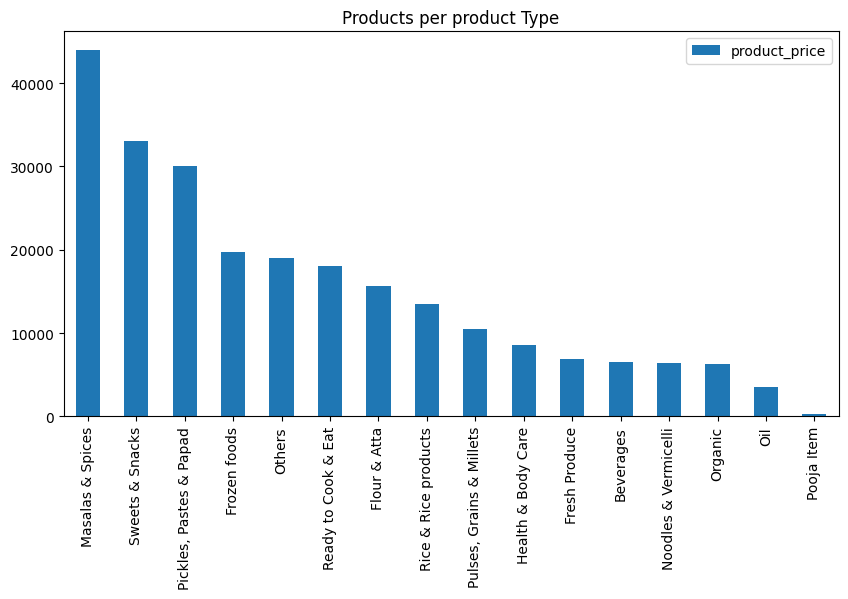

In [95]:
producteffect_sales.plot(kind='bar',figsize=(10,5))
plt.xticks(range(0,16),associated_products['product_type'].values);
plt.title("Products per product Type")

### 9. Is the highest and least sold product same each month?

<AxesSubplot: xlabel='month'>

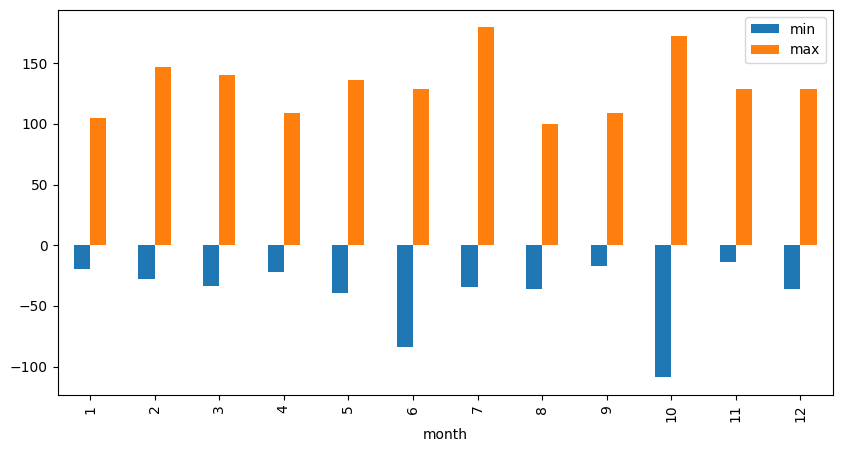

In [96]:
productsoldbymonth = df1.groupby(['month'])['total_sales'].aggregate(['min','max'])
productsoldbymonth.plot(kind='bar',figsize=(10,5))

###  10..Does vendor role plays a factor in affecting the sales?  

In [97]:
Vendoranalysis=df1.groupby('product_vendor').agg({'orders':sum,'total_sales':sum}).reset_index().sort_values(by = 'orders', ascending= False)

Vendoranalysis

,product_vendor,orders,total_sales
61,Haldiram's,10777,81466.18
145,TRS,10668,67722.98
40,Daily Delight,4710,33136.00
167,dbanyan,3689,15037.46
12,Annam,3065,34698.12
...,...,...,...
103,Medjoul,4,62.82
72,Jo-La,4,23.92
78,Kavadi,3,20.94
49,Elephant,3,55.54


In [98]:
VA=Vendoranalysis.head()

<AxesSubplot: >

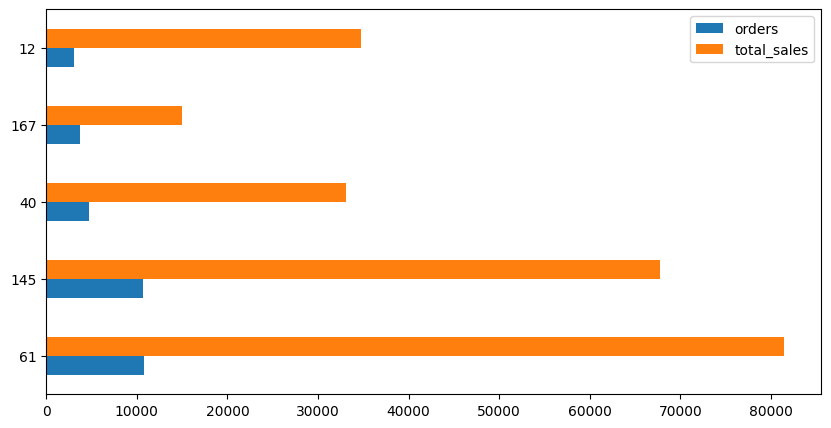

In [99]:
VA.plot(kind='barh',figsize=(10,5))


### 11.is there any relationship between product,vendor and price?

In [100]:

Product_Vender_priceanalysis =  df1.groupby(['product_type', 'product_vendor'])['product_price'].sum().to_frame().reset_index().sort_values(by = 'product_price', ascending= False)
Product_Vender_priceanalysis


,product_type,product_vendor,product_price
274,Sweets & Snacks,Haldiram's,17958.00
44,Frozen foods,Haldiram's,17887.57
217,"Pulses, Grains & Millets",TRS,15511.89
19,Flour & Atta,Aashirvaad,10893.27
246,Rice & Rice products,Annam,10508.41
...,...,...,...
209,Pooja Item,Top Op,6.87
208,Pooja Item,TSR,5.94
202,Pooja Item,Ambala,5.57
199,"Pickles, Pastes & Papad",Sakthi,5.34
